In [ ]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter


#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/My Drive/content/spam.csv", encoding= 'latin-1')  # Replace with your dataset

In [ ]:
df.info()  #to check the information of your dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df  #to display the dataframe

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.columns   #list all column names of the dataframe

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
# Drop unnecessary columns from the Dataset
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]     #columns to drop
df.drop(columns=columns_to_drop, inplace=True)       #inplace=true is used to modify df directly without creating new variable

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Rename the columns "v1 and "v2" to new names as Category and Message

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)    #updating the column name inside df without creating a new DataFrame.

In [ ]:
df[df.duplicated()]    #finding duplicate rows in dataframe

,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
#Drop duplicated values
df=df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [ ]:
df.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,ham,Rofl. Its true to its name
freq,4516,1


In [ ]:
df.shape #shows the number of rows and columns

(5169, 2)

In [ ]:
df['Category'].value_counts()  #to check how many times ham and spam appears in label
                            #oversampling= increases the number of minority class samples
                            #undersampling=reducing the number of majority class samples

,count
Category,
ham,4516
spam,653


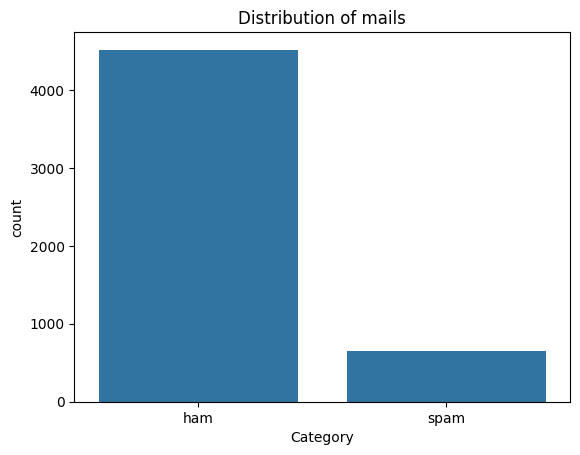

In [ ]:
sns.countplot(data=df, x='Category')  #showing how many times each value appears in the category column
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [ ]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1
df.head()                                         #convert text to numericals

<ipython-input-23-f059b920c7b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["Category"] == "spam", "Category"] = 0
<ipython-input-23-f059b920c7b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["Category"] == "ham", "Category"] = 1


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Separate the feature (X) and target (Y) data

X = df["Message"]
Y = df["Category"]

In [ ]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
Y

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [ ]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print(X.shape)                #checking the shape of the feature matrices
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


In [ ]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)       #Transform training messages into muneric form
X_test_features = feature_extraction.transform(X_test)             #Transform testing messages into numeric form

In [ ]:
# Convert the target values into 0 and 1


Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


In [ ]:
print(X_train)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: Message, Length: 4135, dtype: object


In [ ]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31577 stored elements and shape (4135, 7395)>
  Coords	Values
  (0, 2588)	0.6664392762829205
  (0, 3545)	0.7455593142248959
  (2, 6999)	0.6378379419700079
  (2, 4002)	0.6378379419700079
  (2, 4696)	0.29654379102529516
  (2, 6589)	0.3136674984299076
  (3, 2862)	0.13885072459149478
  (3, 6938)	0.19708708091575408
  (3, 1553)	0.20428654549041733
  (3, 4954)	0.23384958966251285
  (3, 3168)	0.19120469004402674
  (3, 5171)	0.20953002785296104
  (3, 3941)	0.18912243046764834
  (3, 5450)	0.2300494583671639
  (3, 271)	0.23384958966251285
  (3, 4419)	0.2562131692599451
  (3, 516)	0.19460402332334106
  (3, 1997)	0.26549489341098675
  (3, 4630)	0.26549489341098675
  (3, 4299)	0.18532229917229942
  (3, 251)	0.19582167067522926
  (3, 6770)	0.2300494583671639
  (3, 4344)	0.22076773421612225
  (3, 52)	0.26549489341098675
  (3, 1534)	0.23384958966251285
  :	:
  (4132, 4965)	0.4611318152567797
  (4132, 2504)	0.7352222278037867
  (4133, 6589)	

In [ ]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_train_features)  #This tells the model to predict whether each training message is spam or not, using the TF-IDF features.
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)  #compares what the model predicted with the actual labels(Y_train)

In [ ]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9610640870616687


In [ ]:
# Make predictions on the test data and calculate the accuracy

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
# Test the model with some custom email messages

input_mail = ["Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."]
input_data_features = feature_extraction.transform(input_mail)   #converting the message into TF-IDF numerical form
prediction = model.predict(input_data_features)                  #ask the model to predict the message is spam or not

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [ ]:
input_mail = ["This is a friendly reminder about our meeting scheduled for tomorrow at 10:00 AM in the conference room. Please make sure to prepare your presentation and bring any necessary materials."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


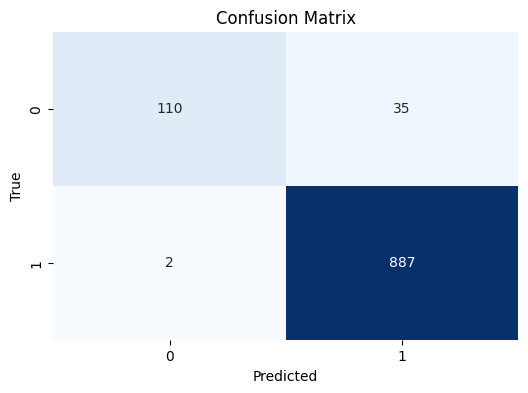

In [ ]:
# Data visualization - Confusion Matrix
# using a confusion matrix to visually evaluate model's performance
cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


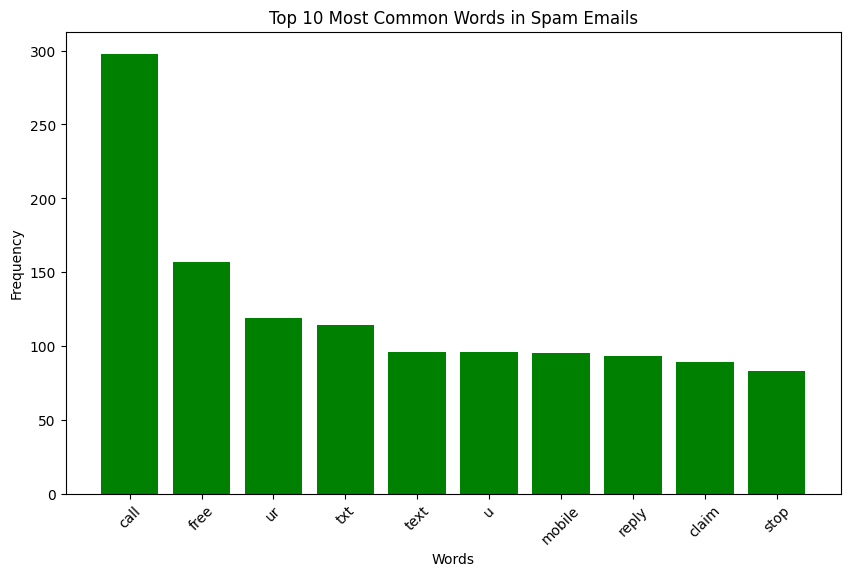

In [ ]:
# Data visualization - Top 10 Most Common Words in Spam Emails
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

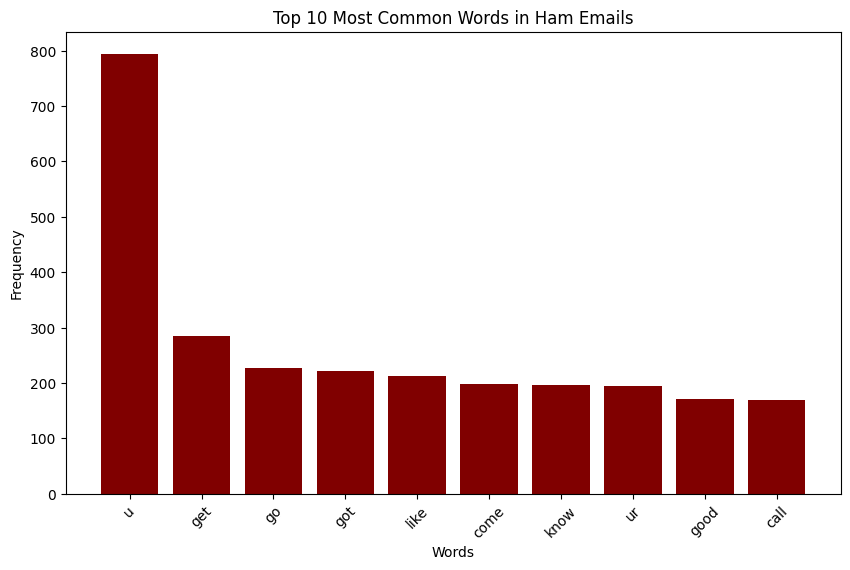

In [ ]:
# Data visualization - Top 10 Most Common Words in Ham Emails

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='maroon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle

# Save trained model
with open('spam_detection_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(feature_extraction, vectorizer_file)

print("✅ Model and vectorizer saved in Colab!")


✅ Model and vectorizer saved in Colab!


In [ ]:
from google.colab import files

files.download('spam_detection_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the model
import pickle
with open('/content/drive/My Drive/content/models/spam_detection_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the vectorizer
with open('/content/drive/My Drive/content/models/tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

print("✅ Model and vectorizer loaded successfully!")


✅ Model and vectorizer loaded successfully!


In [ ]:
model = loaded_model
feature_extraction = loaded_vectorizer

In [ ]:
input_mail = ["Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."]
input_data_features = feature_extraction.transform(input_mail)   #converting the message into TF-IDF numerical form
prediction = model.predict(input_data_features)                  #ask the model to predict the message is spam or not

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail
